In [8]:
from qiskit import *
import numpy as np
from qiskit_aer import AerSimulator

In [9]:
pi = np.pi

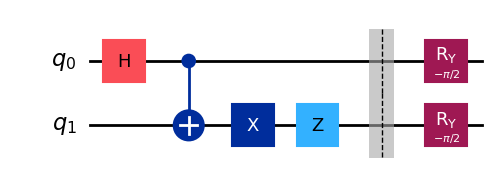

In [10]:
Bell = QuantumCircuit(2)
Bell.h(0)
Bell.cx(0,1)
Bell.x(1)
Bell.z(1)
Bell.barrier()
Bell.ry(-pi/2,0)
Bell.ry(-pi/2,1)
Bell.draw('mpl')

In [11]:
combined = {
    'ZX': (Bell.ry(-pi/2,1)),
    'ZY': (Bell.rx(-pi/2,1)),
    'ZZ': (Bell),
    'XX': (Bell.ry(-pi/2,0), Bell.ry(-pi/2,1)),
    'XY': (Bell.ry(-pi/2,0),Bell.rx(-pi/2,1)),
    'XZ': (Bell.ry(-pi/2,0)),
    'YX': (Bell.rx(-pi/2,0),Bell.ry(-pi/2,1)),
    'YY': (Bell.rx(-pi/2,0),Bell.rx(-pi/2,1)),
    'YZ': (Bell.rx(-pi/2,0))
}

In [12]:
import numpy as np

# Matrizes de Pauli
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# Dicionário de portas
pauli_dict = {
    'I': I,
    'X': X,
    'Y': Y,
    'Z': Z
}

# Lista de combinações
combined = ['ZX','ZY','ZZ',
            'XX','XY','XZ',
            'YX','YY','YZ']

# Produto de Kronecker
tensor_products = {}

for label in combined:
    A = pauli_dict[label[0]]
    B = pauli_dict[label[1]]
    kron_product = np.kron(A, B)
    tensor_products[label] = kron_product
    print(f"{label} =\n{kron_product}\n")


ZX =
[[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]]

ZY =
[[ 0.+0.j  0.-1.j  0.+0.j  0.-0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.-0.j -0.+0.j  0.+1.j]
 [ 0.+0.j  0.+0.j -0.-1.j -0.+0.j]]

ZZ =
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j -0.+0.j  1.-0.j]]

XX =
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

XY =
[[0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]

XZ =
[[ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]]

YX =
[[0.+0.j 0.+0.j 0.-0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.-0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]

YY =
[[ 0.+0.j  0.-

In [14]:
backend = AerSimulator()

In [15]:
def expectation(counts):
    total = sum(counts.values())
    e = 0
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  # Qiskit: bit 0 é o último
        value = 1 if a == b else -1
        e += value * count / total
    return e

In [23]:
def tomography(circuit, target_1,target_2,shots):
    combined = ['ZX','ZY','ZZ',
                'XX','XY','XZ',
                'YX','YY','YZ']

    for base in combined:
        circ = circuit.copy()
        result = {}

        creg = ClassicalRegister(2)
        circ.add_register(creg)

        if base == 'ZX':
            Bell.h(target_2)
        elif base == 'ZY':
            Bell.sdg(target_2)
            Bell.h(target_2)
        elif base == 'ZZ':
            pass

        elif base == 'XX':
            Bell.h(target_1)
            Bell.h(target_2)
        elif base == 'XY':
            Bell.h(target_1)
            Bell.sdg(target_2)
            Bell.h(target_2)
        elif base == 'XZ':
            Bell.h(target_1)

        elif base == 'YX':
            Bell.sdg(target_1)
            Bell.h(target_1)
            Bell.h(target_2)
        elif base == 'YY':
            Bell.sdg(target_1)
            Bell.h(target_1)
            Bell.sdg(target_2)
            Bell.h(target_2)
        elif base == 'YZ':
            Bell.sdg(target_1)
            Bell.h(target_1)

        circ.measure(target_1, creg[0])
        circ.measure(target_2, creg[1])

        transpiled = transpile(circ, backend)
        job = backend.run(transpiled, shots=shots)
        counts = job.result().get_counts()
        result[base] = counts

        E = {label: expectation(c) for label, c in result.items()}

        return E


In [25]:
tomo = tomography(circuit=Bell, target_1=0,target_2=1,shots=1000)
print(tomo)

{'ZX': 0.0}
